In [1]:
import pandas as pd
from Network_cluster import Net_Spectral_clustering,Net_Hierarchical_clustering,Net_Fast_Unfolding
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten 
import matplotlib as mlp
import numpy as np

In [2]:
df_doctor_order = pd.read_csv('7_inhospital_doctor_order_detail.csv')
df_doctor_order.head()

D:\program\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,19,22,23,32,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,HOSPITAL_CODE,PATIENT_ID,PATIENT_NO,INPATIENT_NO,SERIAL_NO,ITEM_SNOMED,SN_COMMENT,ITEM_CODE,MO_NAME,EMP_NO,...,EXEC_DPNM,UPDATED_ON,SEQ_ID,SYS_EMP_NO,DATA_VERSION,SYS_MO_NAME,SYS_DOSE_UNIT,SYS_UNIT,SYS_USE_NAME,ITEM_CLASS
0,43120181600,5300-0099001298,8007713,9311,256100,NaN,NaN,391,骨化三醇软胶囊,30212,...,干部保健科,24-5月 -18 03.20.51.000000 下午,1031512,13030212,0,NaN,NaN,NaN,口服,NaN
1,43120181600,5300-0099001298,8007713,9311,256101,NaN,NaN,292,碳酸钙D3片,30212,...,干部保健科,24-5月 -18 03.20.51.000000 下午,1031513,13030212,0,NaN,NaN,NaN,口服,NaN
2,43120181600,5300-0000043212,8007056,8562,271084,NaN,NaN,101085,酚氨咖敏片,26390,...,神经内科,24-5月 -18 03.20.51.000000 下午,1031515,13026390,0,NaN,NaN,NaN,口服,NaN
3,43120181600,0102086714,8007680,9272,255438,NaN,NaN,1615,5%葡萄糖,30348,...,呼吸内科,24-5月 -18 03.20.51.000000 下午,1031519,13030348,0,NaN,mL,NaN,NaN,NaN
4,43120181600,0102086714,8007680,9272,255439,NaN,NaN,2152,溴己新盐酸盐,30348,...,呼吸内科,24-5月 -18 03.20.51.000000 下午,1031520,13030348,0,溴己新,mg,NaN,NaN,NaN


In [3]:
df_extracted = df_doctor_order[['INPATIENT_NO','ITEM_CODE']]
df_extracted.head()

,INPATIENT_NO,ITEM_CODE
0,9311,391
1,9311,292
2,8562,101085
3,9272,1615
4,9272,2152


In [15]:
import numpy as np
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=500, n_features=6, centers=5, cluster_std=[0.4, 0.3, 0.4, 0.3, 0.4], random_state=11)
X

array([[-7.76324808, -8.84656238,  4.27901582,  2.24092088, -9.01179124,
        -0.38420006],
       [-6.7332813 , -9.41315963, -0.7936109 ,  4.74079464, -1.07047174,
        -0.74584275],
       [-6.95129282, -9.51077056, -0.84525704,  4.10274755, -1.28878541,
         0.14329266],
       ...,
       [-3.52246694, -6.80041267,  4.91296278,  6.27507964, -3.01961225,
        -3.42770556],
       [ 7.76663892,  7.82404263, -6.8318606 ,  2.88728932, -9.76742041,
        -7.50407371],
       [ 8.40228838,  7.63184647, -6.50528954,  3.36423644, -9.48793872,
        -7.73365915]])

In [16]:
y

array([4, 0, 0, 2, 0, 0, 1, 2, 0, 0, 4, 4, 0, 0, 0, 2, 0, 1, 1, 1, 3, 3,
       4, 1, 3, 2, 2, 2, 0, 4, 4, 1, 0, 0, 1, 4, 4, 2, 3, 2, 2, 1, 1, 0,
       2, 3, 4, 4, 1, 3, 3, 4, 2, 2, 4, 1, 3, 3, 2, 2, 4, 3, 3, 3, 1, 0,
       2, 3, 3, 2, 3, 1, 1, 4, 0, 1, 2, 1, 2, 4, 0, 2, 3, 3, 2, 0, 0, 0,
       0, 4, 2, 0, 0, 3, 2, 1, 1, 0, 4, 0, 2, 4, 2, 4, 1, 2, 4, 4, 0, 1,
       0, 4, 2, 2, 2, 3, 4, 2, 2, 0, 4, 0, 1, 0, 0, 4, 4, 1, 4, 2, 3, 2,
       0, 3, 1, 1, 1, 1, 0, 1, 3, 4, 3, 3, 3, 3, 3, 4, 2, 1, 3, 4, 1, 4,
       2, 3, 1, 1, 1, 3, 0, 1, 4, 2, 3, 4, 2, 2, 1, 3, 3, 0, 1, 2, 2, 1,
       2, 3, 3, 2, 2, 0, 2, 0, 1, 0, 4, 0, 3, 1, 3, 1, 3, 0, 2, 4, 0, 2,
       4, 1, 3, 3, 4, 3, 4, 2, 3, 0, 2, 3, 1, 4, 1, 0, 2, 4, 3, 3, 2, 3,
       1, 1, 4, 1, 4, 4, 0, 4, 0, 1, 0, 1, 4, 3, 1, 2, 0, 1, 0, 0, 3, 0,
       1, 1, 0, 2, 1, 4, 2, 2, 4, 0, 2, 3, 0, 1, 3, 1, 1, 4, 1, 4, 1, 1,
       1, 3, 4, 4, 2, 0, 3, 3, 2, 4, 1, 0, 1, 4, 0, 4, 2, 3, 0, 1, 4, 1,
       3, 2, 4, 3, 4, 3, 3, 1, 3, 3, 3, 2, 1, 4, 4,

In [10]:
from sklearn.cluster import SpectralClustering
y_pred = SpectralClustering().fit_predict(X)
from sklearn import metrics
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 14908.932502611722


In [12]:
for index, gamma in enumerate((0.01,0.1,1,10)):
    for index, k in enumerate((3,4,5,6)):
        y_pred = SpectralClustering(n_clusters=k, gamma=gamma).fit_predict(X)
        print("Calinski-Harabasz Score with gamma=", gamma, "n_clusters=", k,"score:", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score with gamma= 0.01 n_clusters= 3 score: 1979.7709609161868
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 4 score: 3154.0184121901607
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 5 score: 23410.63894999138
Calinski-Harabasz Score with gamma= 0.01 n_clusters= 6 score: 19303.734087657893
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 3 score: 1979.7709609161868
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 4 score: 3154.0184121901607
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 5 score: 23410.638949991386
Calinski-Harabasz Score with gamma= 0.1 n_clusters= 6 score: 19427.961894359112
Calinski-Harabasz Score with gamma= 1 n_clusters= 3 score: 1092.169913749734
Calinski-Harabasz Score with gamma= 1 n_clusters= 4 score: 210.83413736826168
Calinski-Harabasz Score with gamma= 1 n_clusters= 5 score: 23410.638949991386
Calinski-Harabasz Score with gamma= 1 n_clusters= 6 score: 19384.965772439966
Calinski-Harabasz Score with gamma=

D:\program\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


 10 n_clusters= 3 score: 41.950682271267375
Calinski-Harabasz Score with gamma= 10 n_clusters= 4 score: 83.98500420863238
Calinski-Harabasz Score with gamma= 10 n_clusters= 5 score: 30.55827447835323
Calinski-Harabasz Score with gamma= 10 n_clusters= 6 score: 47.964806377758066


In [14]:
y_pred = SpectralClustering(gamma=0.1).fit_predict(X)
print("Calinski-Harabasz Score", metrics.calinski_harabaz_score(X, y_pred))

Calinski-Harabasz Score 14961.167933623812


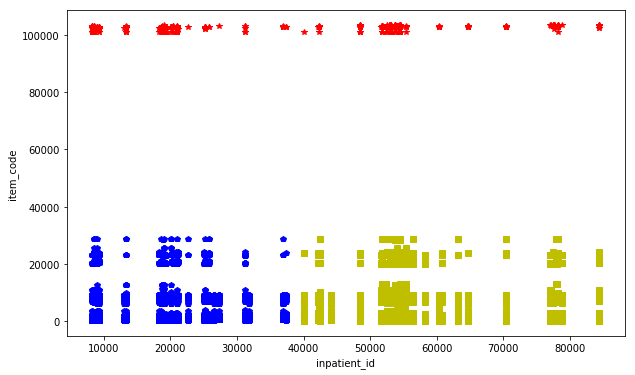

In [21]:
import numpy
#转换数据格式
tmp=numpy.array(df_extracted)
#调用python关于机器学习sklearn库中的KMeans
from sklearn.cluster import KMeans
#设置分为3类，并训练数据
kms=KMeans(n_clusters=3)
y=kms.fit_predict(tmp)
#将分类结果以散点图形式展示
fig = plt.figure(figsize=(10,6))
plt.xlabel('inpatient_id')
plt.ylabel('item_code')
for i in range(0,len(y)):
    if(y[i]==0):      
        plt.plot(tmp[i,0],tmp[i,1],"*r")
    elif(y[i]==1):      
        plt.plot(tmp[i,0],tmp[i,1],"sy")
    elif(y[i]==2):       
        plt.plot(tmp[i,0],tmp[i,1],"pb")
plt.show()


In [19]:
tmp

array([[  9311,   9311,   8562, ...,  78095,  77657,  78095],
       [   391,    292, 101085, ...,   8342,   6758,   9201]], dtype=int64)

In [6]:
from sklearn.manifold import TSNE

tsne=TSNE()
tsne.fit_transform(df_extracted)  #进行数据降维,降成两维
#a=tsne.fit_transform(data_zs) #a是一个array,a相当于下面的tsne_embedding
tsne=pd.DataFrame(tsne.embedding_,index=df_extracted.index) #转换数据格式

import matplotlib.pyplot as plt 

d=tsne[[u'聚类类别']==0]
plt.plot(d[0],d[1],'r.')

d=tsne[r[u'聚类类别']==1]
plt.plot(d[0],d[1],'go')

d=tsne[r[u'聚类类别']==2]
plt.plot(d[0],d[1],'b*')

plt.show()

NameError: name 'r' is not defined

In [7]:
tsne

,0,1
0,-31.360731,10.040743
1,-28.687685,6.537208
2,-3.326895,97.428139
3,-38.281311,42.021412
4,-36.399433,38.158524
5,-38.281311,42.021412
6,-28.143404,8.415919
7,0.766726,95.353149
8,-44.805454,41.650139
9,-43.669170,13.577836


In [4]:
Net_Fast_Unfolding(df_extracted)

IndexError: single positional indexer is out-of-bounds

In [4]:
Net_Spectral_clustering(df_extracted, nclusters=3, affinity_v='rbf')

KeyboardInterrupt: 

In [ ]:
Net_Hierarchical_clustering(df_extracted, cutoff = 0.3,metric_name='jaccard')